
# SWMAL Exercise


## Model capacity and under/overfitting

### Qa) Explain the polynomial fitting via code review


The code below demonstrate the concept of underfitting and overfitting in polynomial regression.  The function```true_fun(X)``` just returns ```np.cos(1.5 * np.pi * X)``` which is used to generate data in the ```GenerateData(n_samples = 30)``` function. The ```GenerateData``` takes a number number of amount of samples and have a default value to 30. It is used to generate random data points for ```X``` and add some noise to the random variable ```y``` to simulate realworld data.  
 
After generation of the data, it creates a list of ```degrees = [1, 4, 15]```. This is used to fit polynomial regression models of different degrees. 

The list of degrees we iterated though each degree. Inside the loop create a pipeline which takes the polynomial_features and linear_regression. ```PolynomialFeatures``` is a prepocessor which have to inputs: the degree and the biased. The first step in the pipeline feeds into the next when the fit on the pipeline is called. The input we reshape the ```X``` into a 2 dimensional array. The reason is the scikit-learn exoects input featues to be 2D. The ```np.newaxis``   ``` generate a new axis. 

Subsequently we are making a cross valiadation score, which evaluates a score by splitting the data into multiple subsets. Then we takes the mean value of the score and print all of the information. 

The plot with 1 degree is clearly a underfit due too it is just a straight line. It does not follow the model. The plot with 15 degree is a overfit, which can be observed by how closely it follows the training data points and the noise. 

On the other hand, the plot with 4 degrees follow the underlying trend in the data without fitting too closely to the noise. 

Iterating...degrees= [1, 4, 15]
  degree=   1, score_mean=-0.41,  PolynomialFeatures(degree=1, include_bias=False)
    CV sub-scores:  mean = -0.41,  std = 0.43
      CV fold 0  =>  score = -1.2
      CV fold 1  =>  score = -0.2
      CV fold 2  =>  score = -0.044
      CV fold 3  =>  score = -0.36
      CV fold 4  =>  score = -0.28
      CV fold 5  =>  score = -0.3
      CV fold 6  =>  score = -0.18
      CV fold 7  =>  score = -0.0086
      CV fold 8  =>  score = -0.25
      CV fold 9  =>  score = -1.3
  degree=   4, score_mean=-0.04,  PolynomialFeatures(degree=4, include_bias=False)
    CV sub-scores:  mean = -0.043,  std = 0.071
      CV fold 0  =>  score = -0.25
      CV fold 1  =>  score = -0.042
      CV fold 2  =>  score = -0.027
      CV fold 3  =>  score = -0.029
      CV fold 4  =>  score = -0.0049
      CV fold 5  =>  score = -0.0049
      CV fold 6  =>  score = -0.019
      CV fold 7  =>  score = -0.038
      CV fold 8  =>  score = -0.012
      CV fold 9  =>  score = -0.00

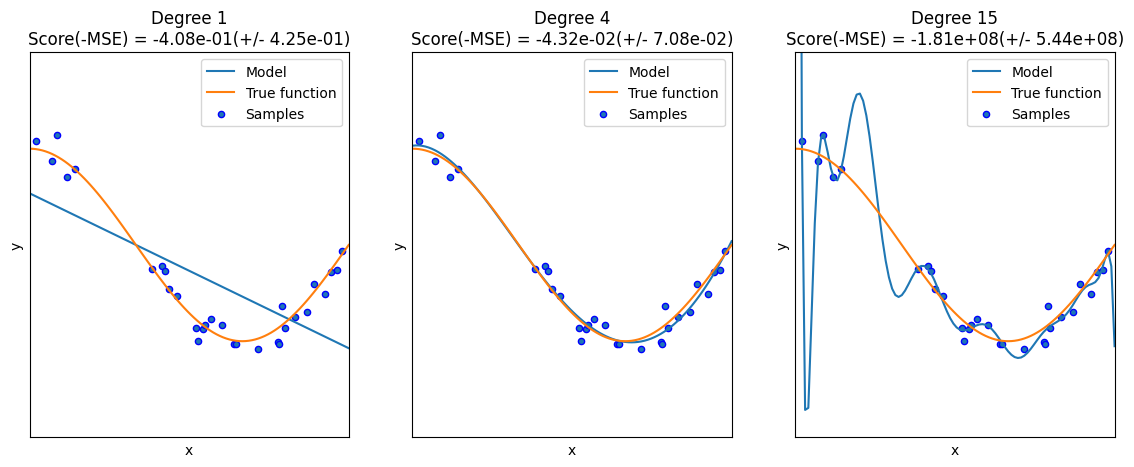

OK


In [4]:
# NOTE: code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

def GenerateData(n_samples = 30):
    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1
    return X, y

np.random.seed(0)

X, y = GenerateData()
degrees = [1, 4, 15]
    
print("Iterating...degrees=",degrees)
plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    
    linear_regression = LinearRegression()
    pipeline = Pipeline([
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression)
        ])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)
    
    score_mean = scores.mean()
    print(f"  degree={degrees[i]:4d}, score_mean={score_mean:4.2f},  {polynomial_features}")   

    X_test = np.linspace(0, 1, 100)
    y_pred = pipeline.predict(X_test[:, np.newaxis])
    
    # Plotting details
    plt.plot(X_test, y_pred          , label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nScore(-MSE) = {:.2e}(+/- {:.2e})".format(degrees[i], scores.mean(), scores.std()))
    
    # CEF: loop added, prints each score per CV-fold. 
    #      NOTICE the sub-means when degree=15!
    print(f"    CV sub-scores:  mean = {scores.mean():.2},  std = {scores.std():.2}")
    for i in range(len(scores)):
        print(f"      CV fold {i}  =>  score = {scores[i]:.2}")
        
plt.show()
print('OK')

### Qb) Explain the capacity and under/overfitting concept
<details>
Write a textual description of the capacity and under/overfitting concept using the plots in the code above.

What happens when the polynomial degree is low/medium/high with respect to under/overfitting  concepts? Explain in details.
</details>

Low degree which means underfitting. This mean the model is too simple to capture the underlying patterns in the data. Can be seen in the picture above, where the model only has 1 degree. The effect the have is the model both perform poorly on the traininng data and any new data.

Meduim degree which means balanced fit. This is when the polynomial degree is moderate. This can be see above for the model with 4 degrees. This mean the model perform well to new unseen data and still capture underlying trend in the data without fitting too closely to the noise.

High degree which means overfitting. This is when the polynomial degree is too hogh and the model is overly complex. So the model performce well on training data, however on all new unseen data it will perform poorly. The plot with 15 degree is a overfit, which can be observed by how closely it follows the training data points and the noise. 

### Qc) Score method


The scoring method ```neg_mean_squared_error``` means that the scikit-learn conventionally uses a higher score to indicate better performance. If we look at the error metric MSE, the lower value indicate a better performance. However, by negating the MSE it is reveresed.

The reason the $J$-function, the $MSE$, is conceptually moving from being a cost-function to now be a score function is, that we often is trying to maximize some measure of model perfoermance.

We tried to set the value of to `mean_squared_error` and it raised an exception. This can be seen the picture below. The reason for it is the theoretical minimum score value for MSE is 0. This would indicate that the model predicts the target perfectly. The highest score has no upper limit and can be extremly large if the pedictions are far from the actual values. 

The degree 15 model have a `Score(-MSE) = -1.8E8` this happend because the value actually are really far from the actually, however this is the ```neg_mean_squared_error```. This indicate that the model is fitting the traning data extremly closely. So based on the number it is close or is overfitting. 

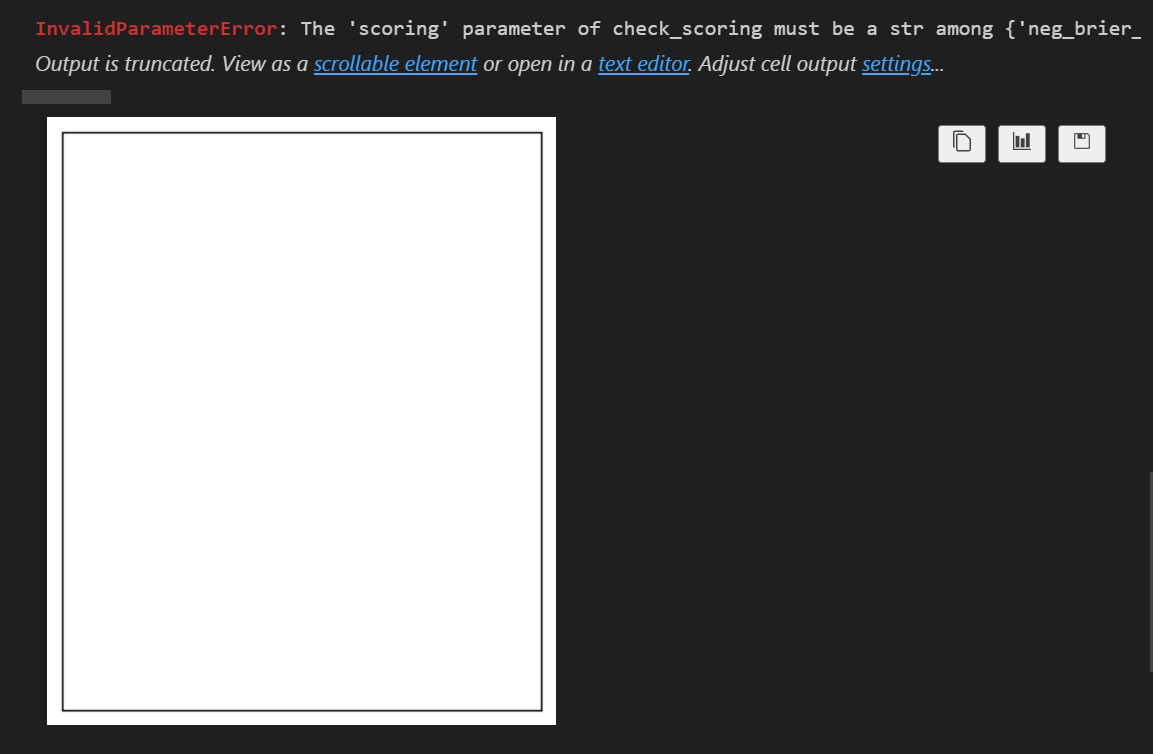